In [1]:
# Step 1: Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy.signal import convolve


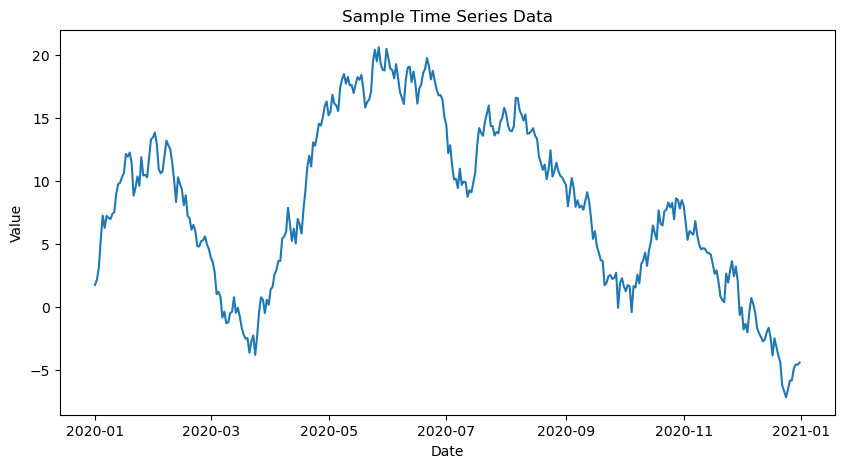

In [2]:

# Step 2: Create a sample time series data
date_range = pd.date_range(start='2020-01-01', end='2020-12-31', freq='D')
np.random.seed(0)
values = np.random.randn(len(date_range)).cumsum()
data = pd.DataFrame({'date': date_range, 'value': values}).set_index('date')

# Plot the sample time series data
plt.figure(figsize=(10, 5))
plt.plot(data.index, data['value'])
plt.title('Sample Time Series Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()


In [10]:
# Split the data into train and test sets
train_data, test_data = train_test_split(data, test_size=0.2, shuffle=False)

In [12]:
# Step 3: Apply convolution operations to extract frequencies
kernel = np.array([1, 1, 1, 1, 1]) / 5 
train_data['convolved'] = convolve(train_data['value'], kernel, mode='same') 
test_data['convolved'] = convolve(test_data['value'], kernel, mode='same')

In [13]:
train_data['convolved']

date
2020-01-01    1.414242
2020-01-02    2.491010
2020-01-03    3.941290
2020-01-04    4.843303
2020-01-05    5.855303
                ...   
2020-10-14    4.741084
2020-10-15    5.046978
2020-10-16    5.465717
2020-10-17    4.569678
2020-10-18    3.535675
Name: convolved, Length: 292, dtype: float64

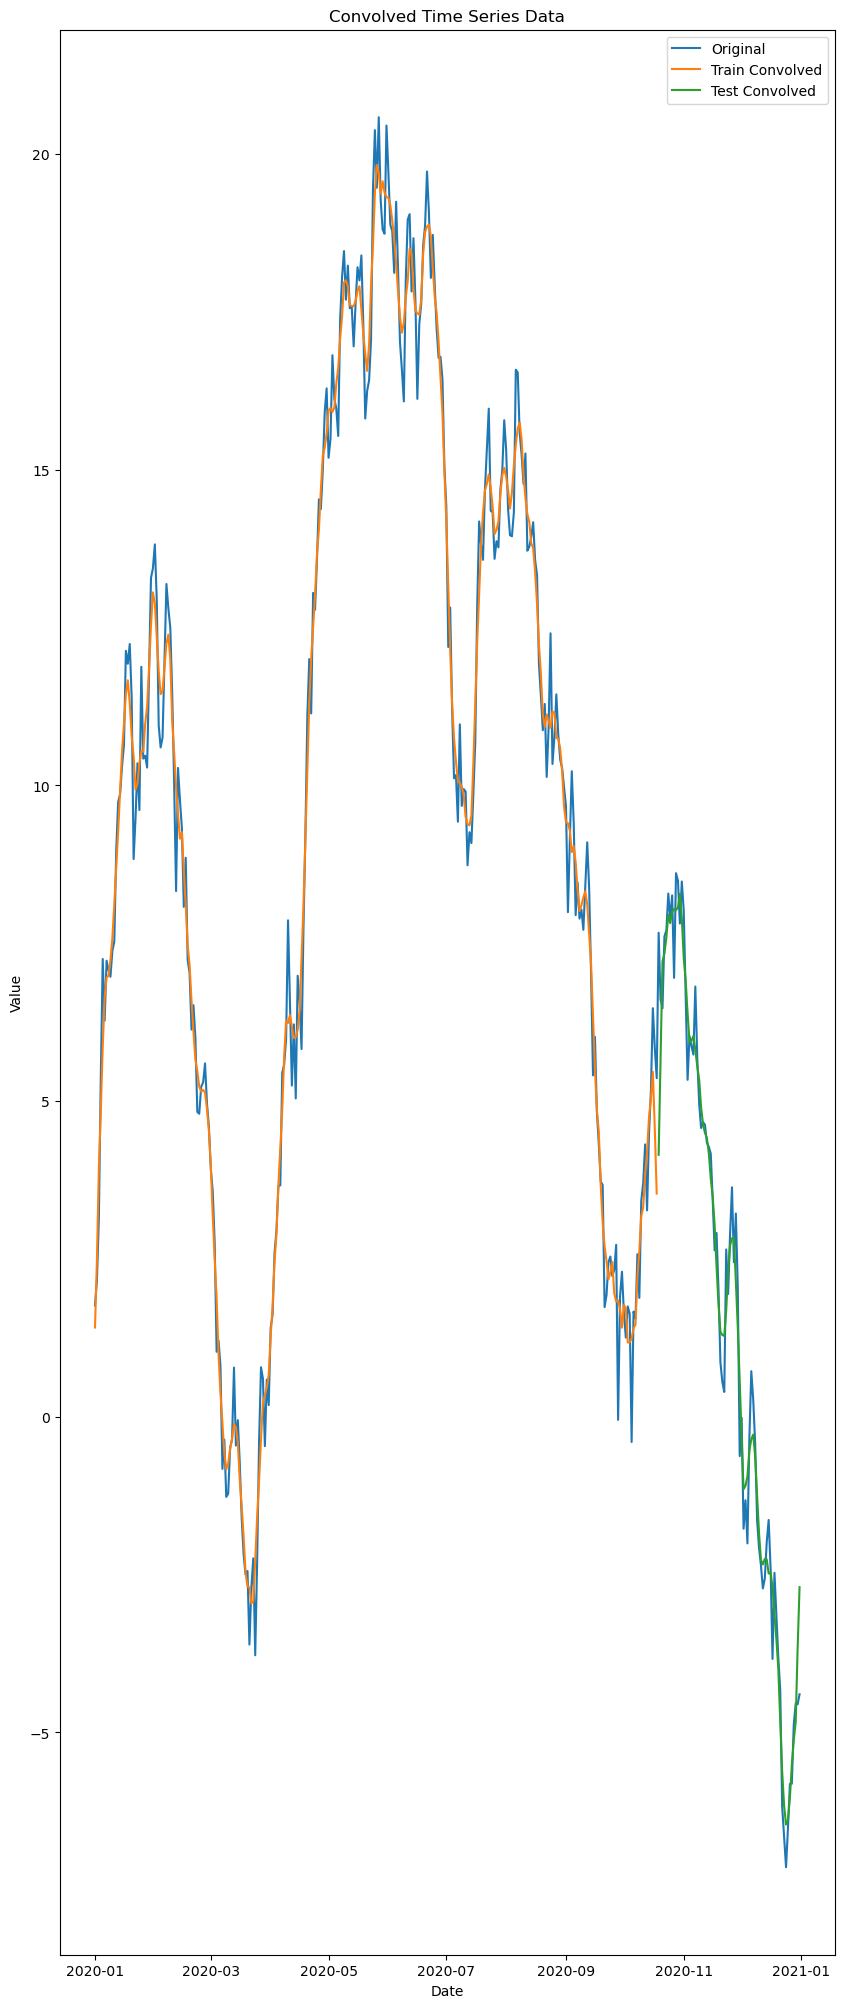

In [17]:
# Plot the convolved data 
plt.figure(figsize=(10, 25)) 
plt.plot(data.index, data['value'],label='Original')
plt.title('Sample Time Series Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.plot(train_data.index, train_data['convolved'], label='Train Convolved') 
plt.plot(test_data.index, test_data['convolved'], label='Test Convolved') 
# Plot the sample time series data

plt.title('Convolved Time Series Data') 
plt.xlabel('Date') 
plt.ylabel('Value') 
plt.legend() 
plt.show()

In [18]:


# Step 4: Generate lag features from the convolved data
def create_lag_features(data, lags):
    for lag in range(1, lags + 1):
        data[f'lag_{lag}'] = data['convolved'].shift(lag)
    return data


In [19]:

train_data = create_lag_features(train_data, lags=5).dropna()
test_data = create_lag_features(test_data, lags=5).dropna()

X_train = train_data.drop(columns=['value', 'convolved'])
y_train = train_data['value']
X_test = test_data.drop(columns=['value', 'convolved'])
y_test = test_data['value']



In [20]:
X_train

,lag_1,lag_2,lag_3,lag_4,lag_5
date,,,,,
2020-01-06,5.855303,4.843303,3.941290,2.491010,1.414242
2020-01-07,6.641284,5.855303,4.843303,3.941290,2.491010
2020-01-08,6.958443,6.641284,5.855303,4.843303,3.941290
2020-01-09,6.984209,6.958443,6.641284,5.855303,4.843303
2020-01-10,7.234240,6.984209,6.958443,6.641284,5.855303
...,...,...,...,...,...
2020-10-14,4.187804,3.837624,3.318133,3.179281,2.627343
2020-10-15,4.741084,4.187804,3.837624,3.318133,3.179281
2020-10-16,5.046978,4.741084,4.187804,3.837624,3.318133


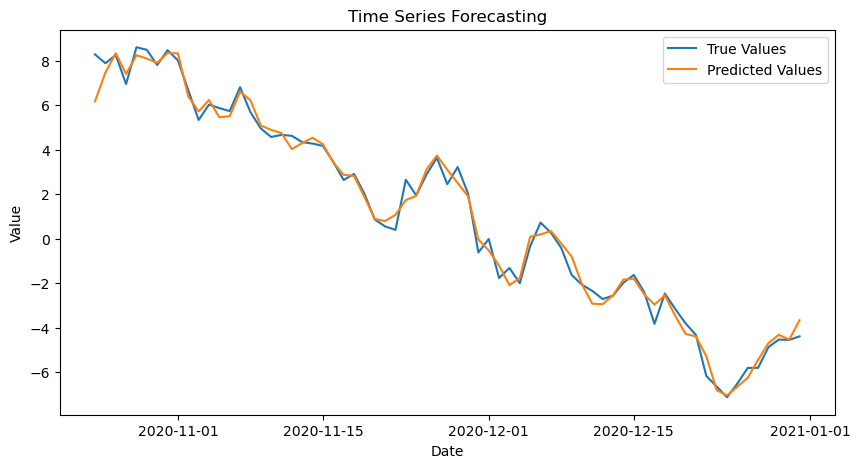

Mean Squared Error: 0.21978547747968746


In [25]:
# Step 5: Build and train a regression model
model = LinearRegression()
model.fit(X_train, y_train) 
# Evaluate the model on the test set
y_pred = model.predict(X_test) 
# Plot the true vs predicted values
plt.figure(figsize=(10, 5)) 
plt.plot(test_data.index, y_test, label='True Values') 
plt.plot(test_data.index, y_pred, label='Predicted Values') 
plt.title('Time Series Forecasting') 
plt.xlabel('Date') 
plt.ylabel('Value') 
plt.legend() 
plt.show() 
# Calculate the Mean Squared Error (MSE) 
mse = np.mean((y_test - y_pred) ** 2) 
print(f'Mean Squared Error: {mse}')

In [38]:
# Step 6: Make future forecasts using the regression model 
def forecast_future(data, model, steps, lags): 
    forecasts = [] 
    for _ in range(steps): 
        last_convolved = data['convolved'].values[-1] 
        new_features = [last_convolved] 
        for lag in range(1, lags): 
            new_features.append(data[f'lag_{lag}'].values[-1]) 
        new_value = model.predict([new_features])[0] 
        forecasts.append(new_value) 
        new_row = pd.Series({'value': new_value, 'convolved': new_value})
        for lag in range(lags): 
            if lag == 0: 
                new_row[f'lag_{lag + 1}'] = new_value
            else: 
                new_row[f'lag_{lag + 1}'] = data[f'lag_{lag}'].values[-1] 
                data = data.append(new_row, ignore_index=True)
    return forecasts
           

C:\Users\genus\anaconda4\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\genus\AppData\Local\Temp\ipykernel_97112\995084121.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(new_row, ignore_index=True)
C:\Users\genus\AppData\Local\Temp\ipykernel_97112\995084121.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(new_row, ignore_index=True)
C:\Users\genus\AppData\Local\Temp\ipykernel_97112\995084121.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(new_row, ignore_index=True)
C:\Users\genus\AppData\Local\Temp\ipykernel_97112\995084121.py:17: Futu

Future Forecasts: [-0.7990671353931305, 4.953464117520962, 16.473625151365972, 39.55799324182432, 85.82880088733837, 178.58881486144233, 364.5604647454635, 737.4229881838785, 1485.0047931817785, 2983.9049185688723]


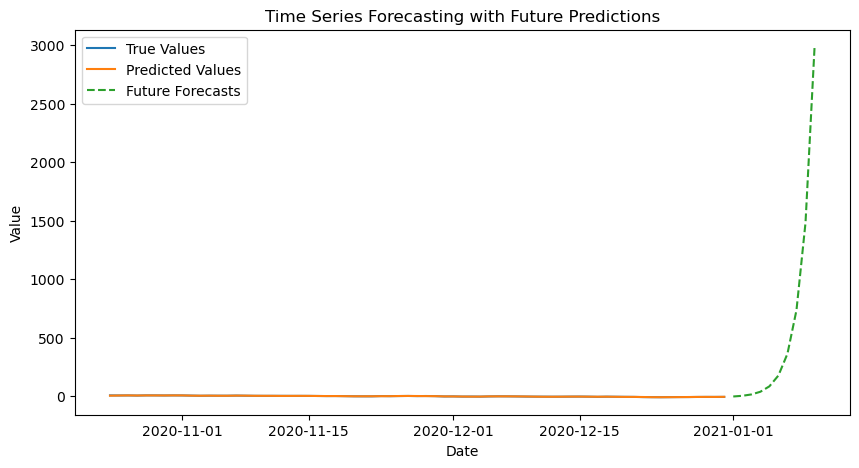

In [39]:
future_steps = 10
future_forecasts = forecast_future(test_data, model, future_steps, lags=5) 
print(f'Future Forecasts: {future_forecasts}') 
# Plot the future forecasts
plt.figure(figsize=(10, 5))
plt.plot(test_data.index, y_test, label='True Values') 
plt.plot(test_data.index, y_pred, label='Predicted Values') 
future_dates = pd.date_range(start=test_data.index[-1], periods=future_steps + 1, freq='D')[1:]
plt.plot(future_dates, future_forecasts, label='Future Forecasts', linestyle='--') 
plt.title('Time Series Forecasting with Future Predictions') 
plt.xlabel('Date') 
plt.ylabel('Value') 
plt.legend() 
plt.show()


Convolutional Neural Networks (CNNs) are excellent at extracting patterns or features from data through convolution operations. When applied to time series data, CNNs can detect and extract patterns related to trends, seasonality, and other underlying structures that may not be immediately obvious.

Here are some examples of patterns or features that a CNN can extract from time series data:

Trends: Long-term upward or downward movements in the data. For example, CNNs can detect a general increase or decrease in stock prices over time.

Seasonality: Repeating patterns at regular intervals. For example, CNNs can identify seasonal patterns in sales data, such as higher sales during holiday seasons.

Short-term fluctuations: High-frequency variations in the data that occur over shorter periods. For example, CNNs can capture daily or weekly fluctuations in temperature data.

Anomalies: Unusual or outlier data points that deviate significantly from the expected patterns. For example, CNNs can detect sudden spikes or drops in sensor data that may indicate a malfunction.

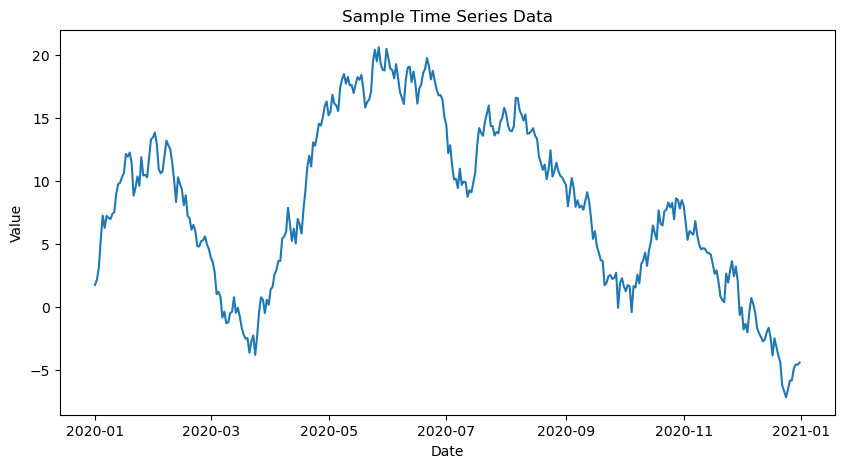

Shape of X_train: (262, 30, 1)
Shape of y_train: (262,)
Shape of X_test: (44, 30, 1)
Shape of y_test: (44,)


C:\Users\genus\anaconda4\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 28, 64)              │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 14, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 896)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 50)                  │          44,850 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 45,157 (176.39 KB)

 Trainable params: 45,157 (176.39 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 60.6789 - val_loss: 16.6796
Epoch 2/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 13.6445 - val_loss: 8.0891
Epoch 3/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.1784 - val_loss: 5.9841
Epoch 4/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.0069 - val_loss: 6.9916
Epoch 5/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.0592 - val_loss: 6.7664
Epoch 6/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.6845 - val_loss: 8.2211
Epoch 7/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.9490 - val_loss: 9.9102
Epoch 8/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.7185 - val_loss: 10.6294
Epoch 9/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.6594 - val_loss: 10.0542
Epoch 10/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.4795 - val_loss: 9.4747
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


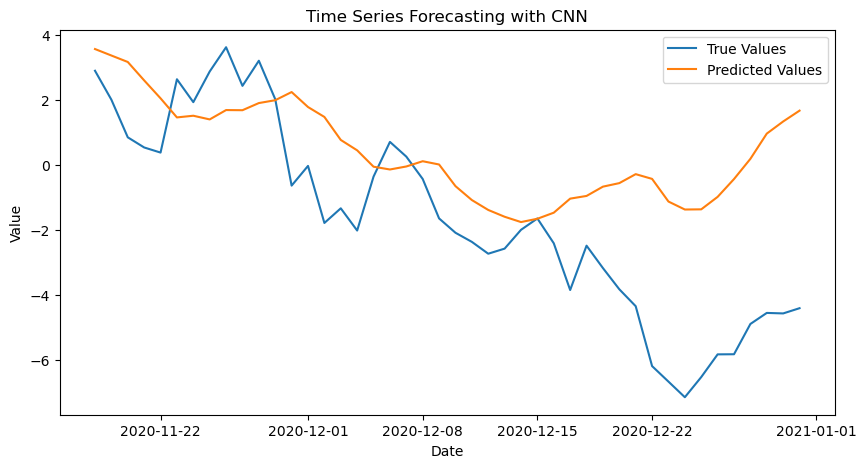

Mean Squared Error: 9.474742044614741
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Future Forecasts: [1.7613773, 1.9880201, 2.9760616, 3.6354895, 4.4969544, 5.736683, 6.714732, 7.842794, 8.643313, 9.790518]


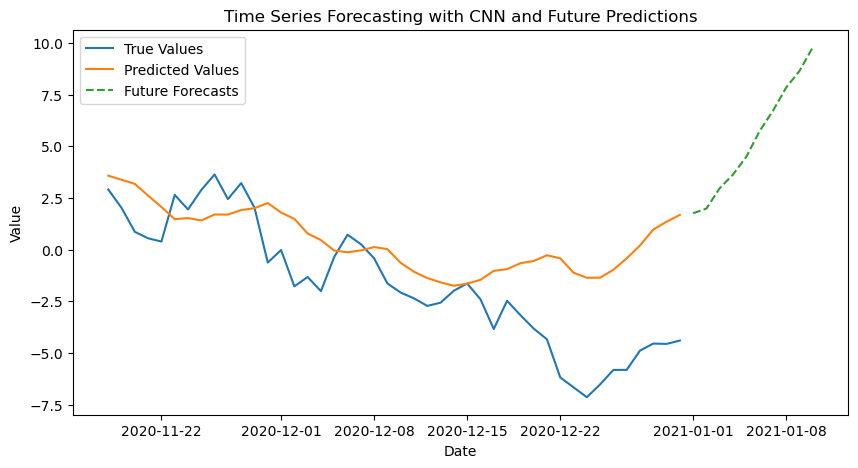

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from statsmodels.tsa.seasonal import seasonal_decompose

# Create a sample time series data
date_range = pd.date_range(start='2020-01-01', end='2020-12-31', freq='D')
np.random.seed(0)
values = np.random.randn(len(date_range)).cumsum()
data = pd.DataFrame({'date': date_range, 'value': values}).set_index('date')

# Plot the sample time series data
plt.figure(figsize=(10, 5))
plt.plot(data.index, data['value'])
plt.title('Sample Time Series Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()


# Split the data into train and test sets
train_data, test_data = train_test_split(data, test_size=0.2, shuffle=False)

# Prepare the data for the CNN
def create_sequences(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i + window_size])
        y.append(data[i + window_size])
    return np.array(X), np.array(y)

window_size = 30
X_train, y_train = create_sequences(train_data['value'].values, window_size)
X_test, y_test = create_sequences(test_data['value'].values, window_size)

# Reshape the data to fit the CNN input shape
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

# Build the CNN model
cnn_model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(window_size, 1)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(50, activation='relu'),
    Dense(1)
])

cnn_model.compile(optimizer='adam', loss='mse')
cnn_model.summary()

# Train the CNN model
cnn_model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Evaluate the model on the test set
y_pred = cnn_model.predict(X_test)

# Plot the true vs predicted values
plt.figure(figsize=(10, 5))
plt.plot(test_data.index[window_size:], y_test, label='True Values')
plt.plot(test_data.index[window_size:], y_pred, label='Predicted Values')
plt.title('Time Series Forecasting with CNN')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

# Calculate the Mean Squared Error (MSE)
mse = np.mean((y_test - y_pred.flatten()) ** 2)
print(f'Mean Squared Error: {mse}')

# Function to make future forecasts using the CNN model
def forecast_future_cnn(data, model, steps, window_size):
    forecasts = []
    data_values = data['value'].values
    for _ in range(steps):
        input_seq = data_values[-window_size:].reshape(1, window_size, 1)
        new_value = model.predict(input_seq)[0, 0]
        forecasts.append(new_value)
        data_values = np.append(data_values, new_value)
    return forecasts

# Make future forecasts
future_steps = 10
future_forecasts = forecast_future_cnn(test_data, cnn_model, future_steps, window_size)
print(f'Future Forecasts: {future_forecasts}')

# Plot the future forecasts
plt.figure(figsize=(10, 5))
plt.plot(test_data.index[window_size:], y_test, label='True Values')
plt.plot(test_data.index[window_size:], y_pred, label='Predicted Values')
future_dates = pd.date_range(start=test_data.index[-1], periods=future_steps + 1, freq='D')[1:]
plt.plot(future_dates, future_forecasts, label='Future Forecasts', linestyle='--')
plt.title('Time Series Forecasting with CNN and Future Predictions')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()


In [42]:
# Calculate the Mean Squared Error (MSE)
mse = np.mean((y_test - y_pred.flatten()) ** 2)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 9.474742044614741


explain an additive vs multiplicative time series
Time series data can exhibit various patterns, including trends, seasonality, and noise. Two common models used to describe these patterns are additive and multiplicative time series models. Here's a breakdown of each:

Additive Time Series
In an additive time series model, the components of the time series (trend, seasonality, and noise) are added together. The relationship between these components is linear, meaning that the effect of each component is constant over time.

Mathematically:

𝑌
(
𝑡
)
=
𝑇
(
𝑡
)
+
𝑆
(
𝑡
)
+
𝑒
(
𝑡
)
Where:

𝑌
(
𝑡
)
 is the observed value at time 
𝑡
.

𝑇
(
𝑡
)
 is the trend component at time 
𝑡
.

𝑆
(
𝑡
)
 is the seasonal component at time 
𝑡
.

𝑒
(
𝑡
)
 is the residual (noise) component at time 
𝑡
.

Example: An additive model might be appropriate for a time series where the seasonal fluctuations and trend are constant over time. For instance, consider a sales dataset where the seasonal variation in sales is consistent every year, regardless of the overall sales volume.

Multiplicative Time Series
In a multiplicative time series model, the components of the time series are multiplied together. The relationship between these components is non-linear, meaning that the effect of each component changes over time and is proportional to the level of the time series.

Mathematically:

𝑌
(
𝑡
)
=
𝑇
(
𝑡
)
×
𝑆
(
𝑡
)
×
𝑒
(
𝑡
)
Where:

𝑌
(
𝑡
)
 is the observed value at time 
𝑡
.

𝑇
(
𝑡
)
 is the trend component at time 
𝑡
.

𝑆
(
𝑡
)
 is the seasonal component at time 
𝑡
.

𝑒
(
𝑡
)
 is the residual (noise) component at time 
𝑡
.

Example: A multiplicative model might be suitable for a time series where the seasonal fluctuations and trend vary with the level of the series. For example, if the time series represents monthly sales data that shows larger seasonal variations during high sales periods and smaller variations during low sales periods, a multiplicative model would be more appropriate.

Visualization
Here's a simple way to visualize the difference:

Additive Model:

Trend: 
𝑇
(
𝑡
)
 could be a straight line.

Seasonality: 
𝑆
(
𝑡
)
 could be a sinusoidal wave with a constant amplitude.

Residuals: 
𝑒
(
𝑡
)
 could be random noise with a constant variance.

Multiplicative Model:

Trend: 
𝑇
(
𝑡
)
 could be an exponential curve.

Seasonality: 
𝑆
(
𝑡
)
 could be a sinusoidal wave with an amplitude that grows or shrinks over time.

Residuals: 
𝑒
(
𝑡
)
 could be random noise with a variance that changes over time.

Choosing between an additive and multiplicative model depends on the characteristics of your time series data. If the seasonal effect is constant over time, an additive model is suitable. If the seasonal effect varies with the level of the time series, a multiplicative model is more appropriate.